<a href="https://colab.research.google.com/github/pjkattel/Python-/blob/master/CNN_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Visualize image, filter and feature map Progression

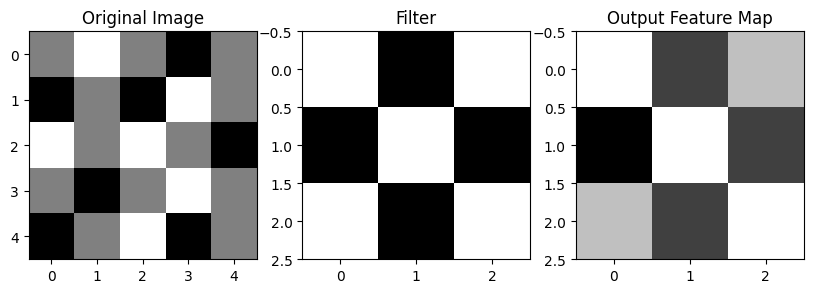

In [2]:
# Create a simple 5x5 grayscale "image"
image = np.array([
    [1, 2, 1, 0, 1],
    [0, 1, 0, 2, 1],
    [2, 1, 2, 1, 0],
    [1, 0, 1, 2, 1],
    [0, 1, 2, 0, 1]
], dtype=np.float32)

# Define a 3x3 filter (kernel)
filter_ = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
], dtype=np.float32)

# Perform convolution manually
output_height = image.shape[0] - filter_.shape[0] + 1
output_width = image.shape[1] - filter_.shape[1] + 1
output = np.zeros((output_height, output_width))

for i in range(output_height):
    for j in range(output_width):
        patch = image[i:i+3, j:j+3]
        output[i, j] = np.sum(patch * filter_)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1,3,2)
plt.title("Filter")
plt.imshow(filter_, cmap='gray')
plt.subplot(1,3,3)
plt.title("Output Feature Map")
plt.imshow(output, cmap='gray')
plt.show()


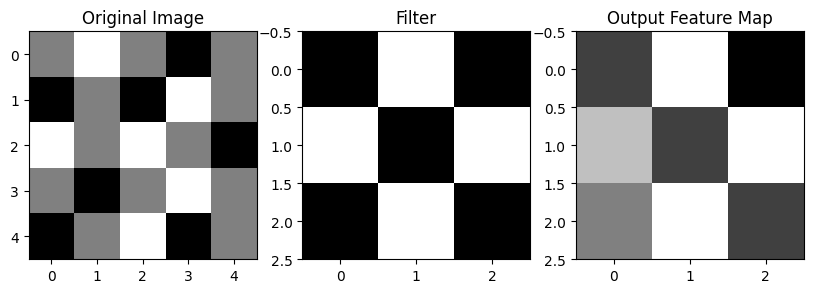

In [4]:
# Create a simple 5x5 grayscale "image"
image = np.array([
    [1, 2, 1, 0, 1],
    [0, 1, 0, 2, 1],
    [2, 1, 2, 1, 0],
    [1, 0, 1, 2, 1],
    [0, 1, 2, 0, 1]
], dtype=np.float32)

# Define a 3x3 filter (kernel)
filter_ = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
], dtype=np.float32)

# Perform convolution manually
output_height = image.shape[0] - filter_.shape[0] + 1
output_width = image.shape[1] - filter_.shape[1] + 1
output = np.zeros((output_height, output_width))

for i in range(output_height):
    for j in range(output_width):
        patch = image[i:i+3, j:j+3]
        output[i, j] = np.sum(patch * filter_)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1,3,2)
plt.title("Filter")
plt.imshow(filter_, cmap='gray')
plt.subplot(1,3,3)
plt.title("Output Feature Map")
plt.imshow(output, cmap='gray')
plt.show()


## Lets see Vertical and Horizontal filters

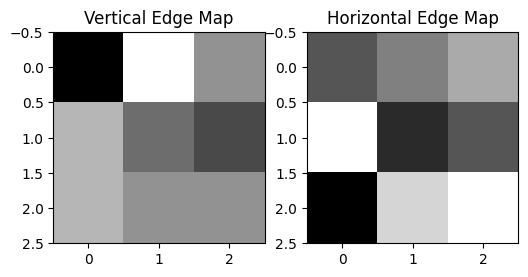

In [5]:
# Use two filters detecting different patterns
filters = np.array([
    [[1, 0, -1],
     [1, 0, -1],
     [1, 0, -1]],  # Vertical edge filter
    [[1, 1, 1],
     [0, 0, 0],
     [-1, -1, -1]]  # Horizontal edge filter
], dtype=np.float32)

# Convert image and filters to TensorFlow tensors
image_tf = tf.constant(image.reshape(1, 5, 5, 1))  # shape: (batch, height, width, channels)
filters_tf = tf.constant(filters.reshape(3, 3, 1, 2))  # shape: (kernel_h, kernel_w, in_channels, out_channels)

# Apply convolution
feature_maps = tf.nn.conv2d(image_tf, filters_tf, strides=1, padding='VALID')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.title("Vertical Edge Map")
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.subplot(1,2,2)
plt.title("Horizontal Edge Map")
plt.imshow(feature_maps[0, :, :, 1], cmap='gray')
plt.show()


# lets see how Padding and Stride works

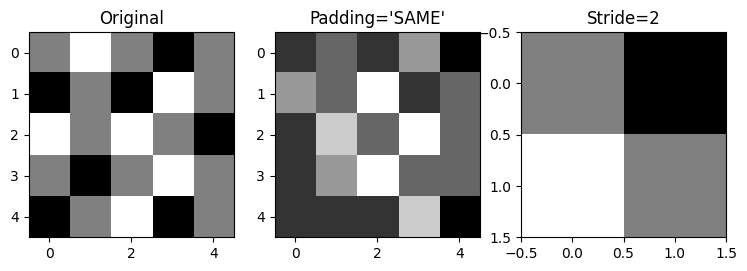

In [6]:
# Apply same filter with different padding and strides
filter_single = tf.constant(filter_.reshape(3,3,1,1))

same_pad = tf.nn.conv2d(image_tf, filter_single, strides=1, padding='SAME')
stride2 = tf.nn.conv2d(image_tf, filter_single, strides=2, padding='VALID')

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.subplot(1,3,2)
plt.title("Padding='SAME'")
plt.imshow(same_pad[0,:,:,0], cmap='gray')
plt.subplot(1,3,3)
plt.title("Stride=2")
plt.imshow(stride2[0,:,:,0], cmap='gray')
plt.show()


In [7]:
model = keras.Sequential([
    layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28, 1)),  # 8 filters → 8 feature maps
    layers.Conv2D(16, (3,3), activation='relu')  # 16 filters → each sees all 8 previous maps
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         1,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248 (4.88 KB)

 Trainable params: 1,248 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

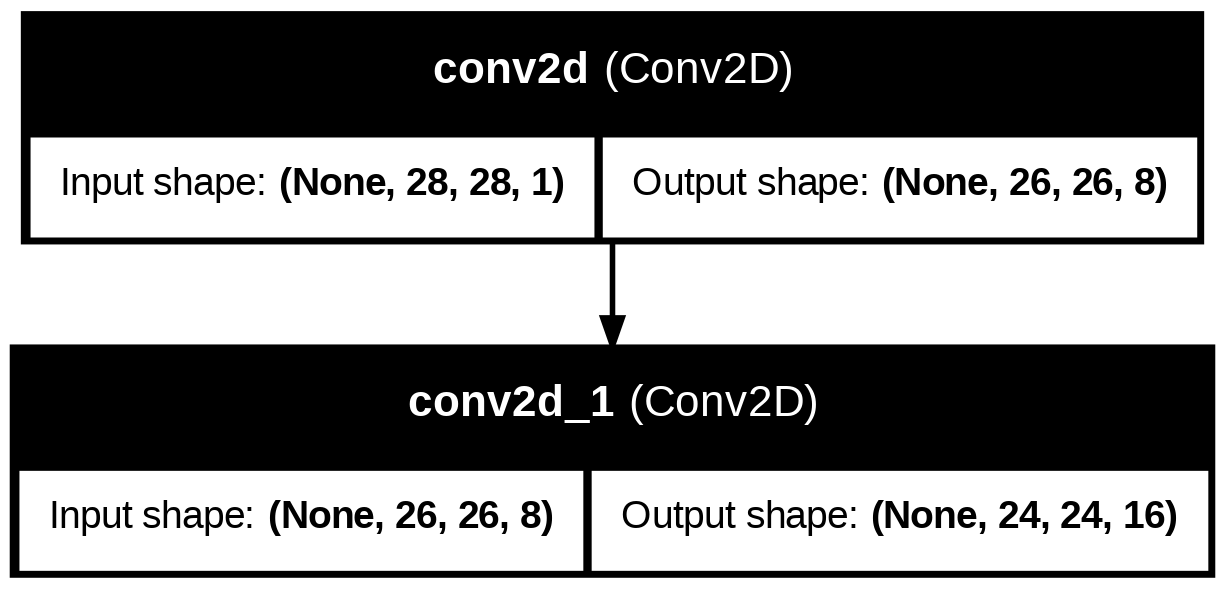

In [8]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)


## Feature map for actual data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


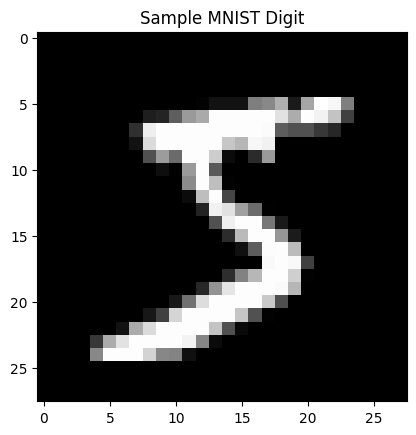

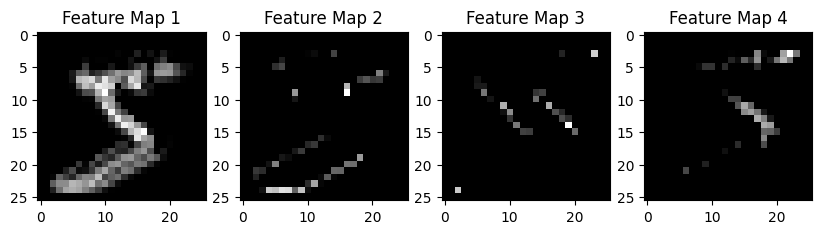

In [9]:
(x_train, _), _ = keras.datasets.mnist.load_data()
x_sample = x_train[0:1].astype('float32') / 255.0
x_sample = np.expand_dims(x_sample, -1)  # add channel dimension

plt.imshow(x_sample[0,:,:,0], cmap='gray')
plt.title("Sample MNIST Digit")
plt.show()

# Pass through first conv layer
conv_layer = layers.Conv2D(4, (3,3), activation='relu')
feature_maps = conv_layer(x_sample)

fig, axes = plt.subplots(1,4, figsize=(10,3))
for i in range(4):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].set_title(f'Feature Map {i+1}')
plt.show()


## Pooling Visualization

Original Feature Map:
 [[1. 3. 2. 4.]
 [5. 6. 7. 8.]
 [3. 2. 1. 0.]
 [1. 2. 3. 4.]]

After Max Pooling:
 [[6. 8.]
 [3. 4.]]


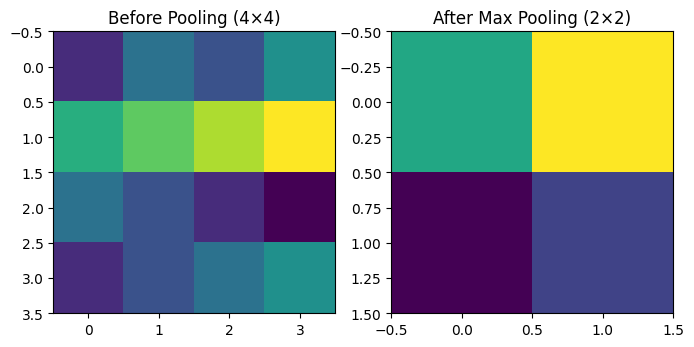

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# A sample feature map (like from a convolutional layer)
feature_map = np.array([
    [1, 3, 2, 4],
    [5, 6, 7, 8],
    [3, 2, 1, 0],
    [1, 2, 3, 4]
], dtype=np.float32)

feature_map = feature_map.reshape(1, 4, 4, 1)  # batch, height, width, channels

# Apply MaxPooling
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
pooled_output = max_pool(feature_map)

print("Original Feature Map:\n", feature_map[0,:,:,0])
print("\nAfter Max Pooling:\n", pooled_output[0,:,:,0].numpy())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(feature_map[0,:,:,0], cmap='viridis')
axes[0].set_title("Before Pooling (4×4)")
axes[1].imshow(pooled_output[0,:,:,0], cmap='viridis')
axes[1].set_title("After Max Pooling (2×2)")
plt.show()

## Pooling vs Convolution visualization

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original: (28, 28)
After Conv: (1, 28, 28, 4)
After Pool: (1, 14, 14, 4)


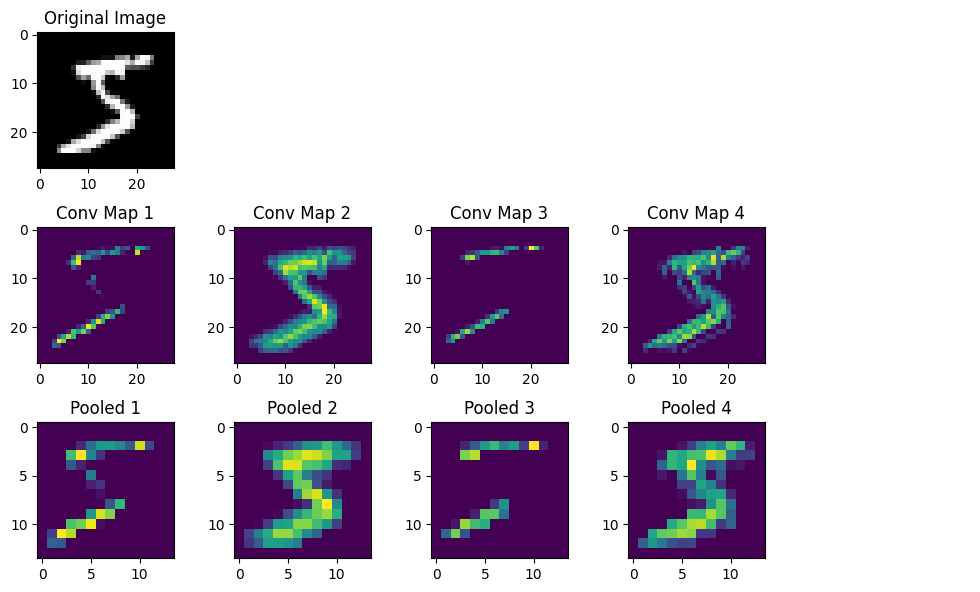

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# --- Load one MNIST image ---
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
image = x_train[0] / 255.0  # normalize 0–1
image_batch = np.expand_dims(image, axis=(0, -1))  # shape: (1, 28, 28, 1)

# --- Define convolution and pooling layers ---
conv = layers.Conv2D(4, (3,3), activation='relu', padding='same')  # 4 filters
pool = layers.MaxPooling2D((2,2))

# --- Apply layers manually ---
conv_out = conv(image_batch)
pool_out = pool(conv_out)

print("Original:", image.shape)
print("After Conv:", conv_out.shape)
print("After Pool:", pool_out.shape)

# --- Visualize ---
fig, axes = plt.subplots(3, 5, figsize=(10, 6))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
for j in range(1, 5):
    axes[0, j].axis('off')

# Feature maps after convolution
for i in range(4):
    axes[1, i].imshow(conv_out[0, :, :, i], cmap='viridis')
    axes[1, i].set_title(f"Conv Map {i+1}")
axes[1, 4].axis('off')

# Pooled maps
for i in range(4):
    axes[2, i].imshow(pool_out[0, :, :, i], cmap='viridis')
    axes[2, i].set_title(f"Pooled {i+1}")
axes[2, 4].axis('off')

plt.tight_layout()
plt.show()
